## CAR SALES EDA

In [1]:
#pip install missingno

In [2]:
# Import Libraries

import numpy as np                   # impliment multi-dimentional arrays and matrices
import pandas as pd                  # for data manupulation and analysis
import matplotlib.pyplot as plt      # for data visualization
import seaborn as sns                # privide high_level of interface for drawing attractive and informative statistics
%matplotlib inline
import missingno as msno
sns.set()
from subprocess import check_output   # for viewing profile report
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data and view top 5 

carsales = pd.read_excel(r"C:\Users\XLADE\Desktop\FSDS\WEEK 9 Matplotlib, Seaborn & EDA\Car_Sales.xlsx")

carsales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


#### Overview of dataset

In [4]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [5]:
# Dimensionality 
carsales.shape

(9576, 10)

In [6]:
# statistical summary of the dataset
carsales.describe().astype(int)

,price,mileage,engV,year
count,9576,9576,9142,9576
mean,15633,138,2,2006
std,24106,98,5,7
min,0,0,0,1953
25%,4999,70,1,2004
50%,9200,128,2,2008
75%,16700,194,2,2012
max,547800,999,99,2016


In [7]:
#missing value count
carsales.isna().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

##### Data Cleaning

In [8]:
# make a copy of df - .copy()
carsales1 = carsales.copy()
carsales1.head(2)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear


##### Rename column names

In [9]:
carsales.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [30]:
carsales.columns = ['car_brand', 'price', 'body', 'mileage', 'engineValues', 'engineType', 'registration',
       'year', 'model', 'drive']
carsales.head(2)

,car_brand,price,body,mileage,engineValues,engineType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear


Handling Duplicates


In [11]:
carsales.duplicated().sum()


113

In [12]:
# drop duplicate rows

carsales.drop_duplicates(inplace=True)

In [13]:
# dimenssionality of the data

carsales.shape

(9463, 10)

Handling missing values

In [14]:
# filling missing values for drive
# find the mode
carsales["drive"].mode()

0    front
Name: drive, dtype: object

In [15]:
#fill missing values with the mode "front"

carsales["drive"] =  carsales["drive"].fillna('front')

In [16]:
#fill missing values for engineValue with the median
carsales["engineValues"] = carsales.groupby(['car_band', 'body'])['engineValues'].transform(lambda x: x.fillna(x.median()))

In [17]:
#Let's see what we did
carsales.isna().sum()

car_band         0
price            0
body             0
mileage          0
engineValues    10
engineType       0
registration     0
year             0
model            0
drive            0
dtype: int64

In [18]:
#drop the remaining NaN values
carsales.dropna(subset=['engineValues'],inplace=True)
carsales.isnull().sum()

car_band        0
price           0
body            0
mileage         0
engineValues    0
engineType      0
registration    0
year            0
model           0
drive           0
dtype: int64

In [19]:
carsales.price[carsales.price==0].count()

238

In [20]:
# Dropping entries with price <= 0 

carsales = carsales.drop(carsales[carsales.price <=0].index)

In [21]:
#confirming that the prices == 0 has been dropped

carsales.price[carsales.price==0].count()

0

#### Questions:

* Which type of cars are sold maximum?
* What is the correlation between price and mileage?
* How many cars are registered?
* Does the registeration status influence car price?
* What is the car price distribution based on Engine Value?
* Which car type has the highest pricing?

### EDA

 1. Which type of cars are sold most?

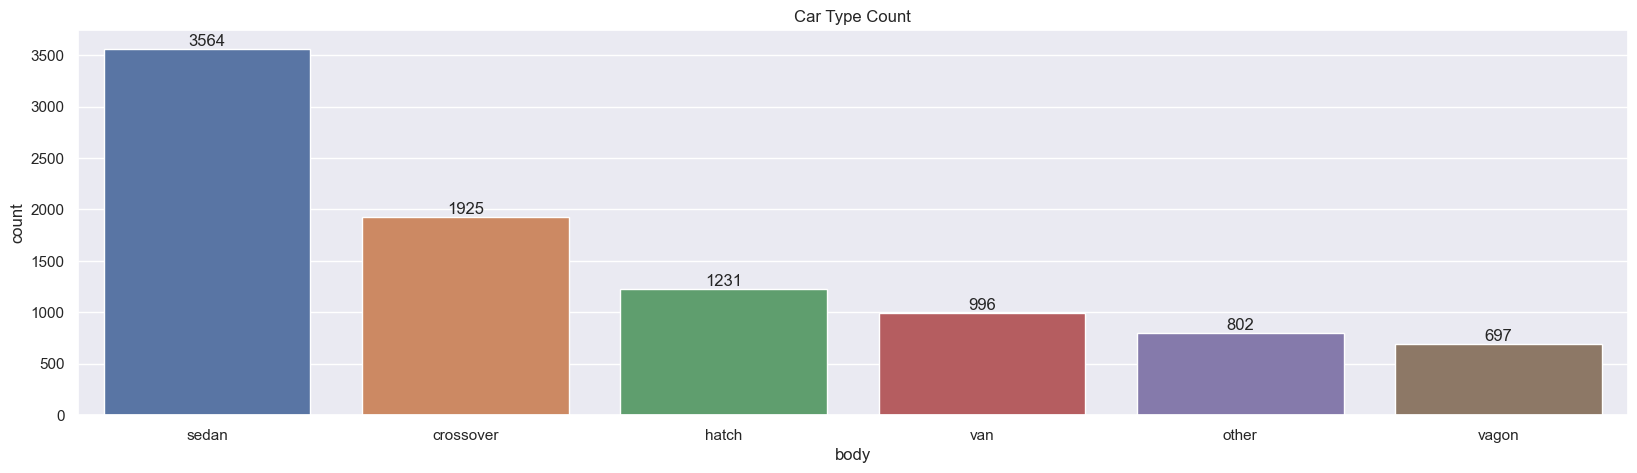

In [35]:
# total 10 sales by car_band

plt.figure(figsize=(20,5))
ax = sns.countplot(x=carsales["body"], order=carsales["body"].value_counts(ascending=False).index)
values = carsales["body"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Car Type Count");

Insights:

Clearly seen that Sedan cars are sold most and followed the crossover

2. What is the correlation between price and mileage?

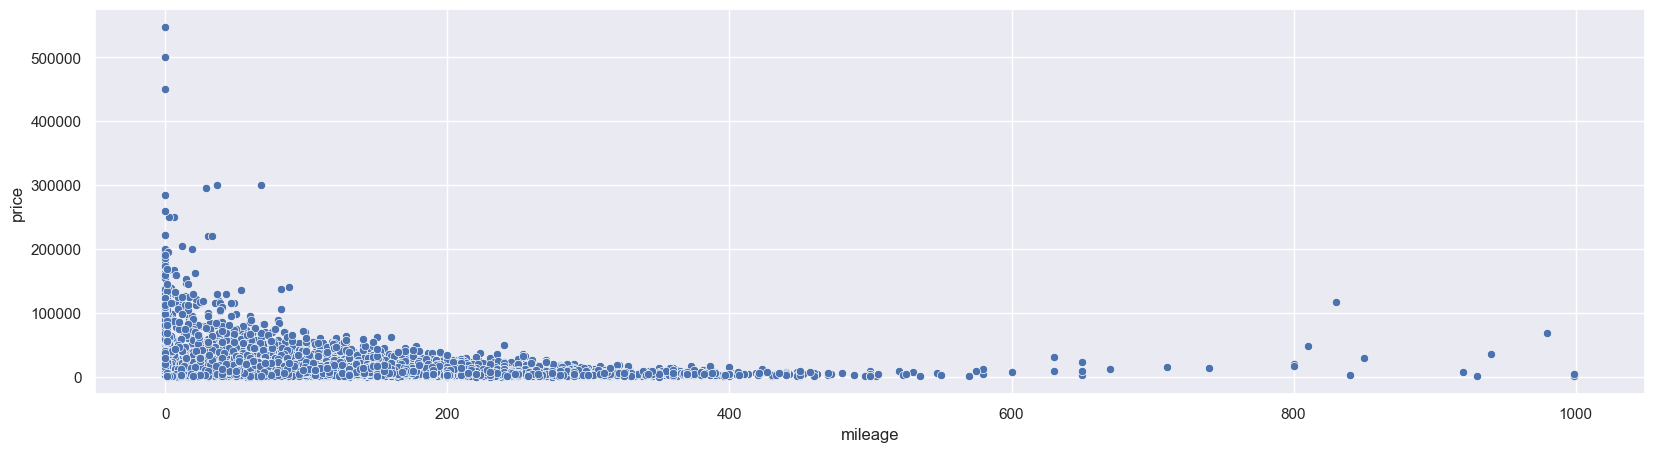

In [38]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="mileage", y="price", data = carsales)

Insights:
the chart above clearly shows a negative correlation between prlice and milage.(the lower the milage the higher the price) even though there are a few outliers

3. How many cars are registered?

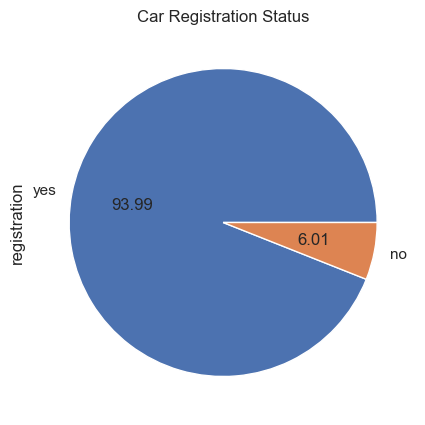

In [39]:

plt.figure(figsize =(10,5))
carsales['registration'].value_counts(normalize=True).plot.pie(autopct="%.2f")
plt.title("Car Registration Status");

Insight:
The pie chart above shows that 93.99% of the cars are registered

From the chart above, we can see that 8,661 numbers of cars are registered

4. Does the registration status influence car price?.

<Axes: xlabel='registration', ylabel='price'>

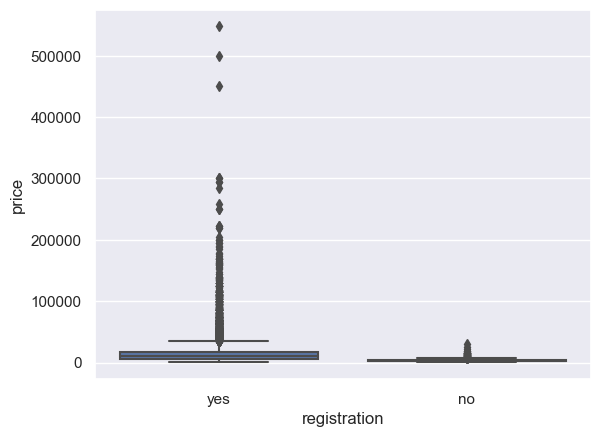

In [43]:
sns.boxplot(x="registration", y="price", data=carsales)

Insight:
Non-Registered cars are cheaper in cost compared to registered cars

5. What is the car price distribution based on Engine Value?

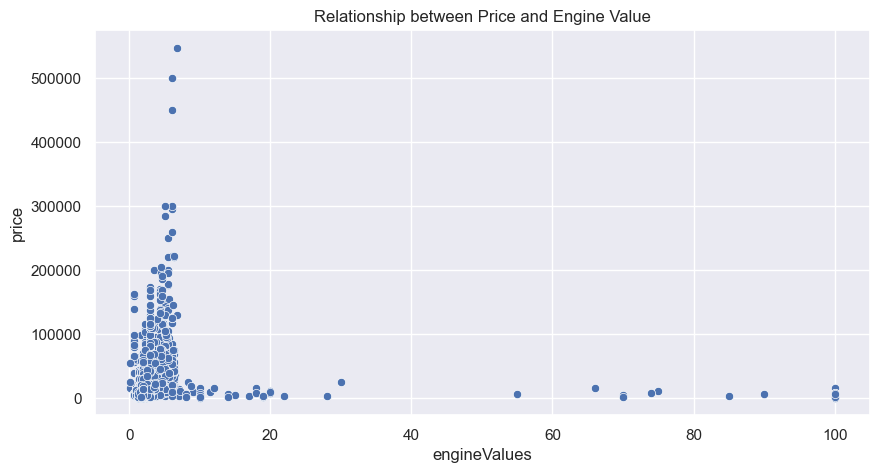

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="engineValues", y="price", data=carsales)
plt.title("Relationship between Price and Engine Value");

Insight: 
the smaller the engine value, the higher the price

In [31]:
carsales.head()

,car_brand,price,body,mileage,engineValues,engineType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.3,Other,yes,2013,E-Class,front


In [ ]:
# 6. Which car type has the highest pricing?

In [50]:
a = carsales.groupby("body")["price"].mean().sort_values(ascending=False).astype(int)
a

body
crossover    29914
other        19675
sedan        12217
van          10707
vagon         8914
hatch         8463
Name: price, dtype: int32

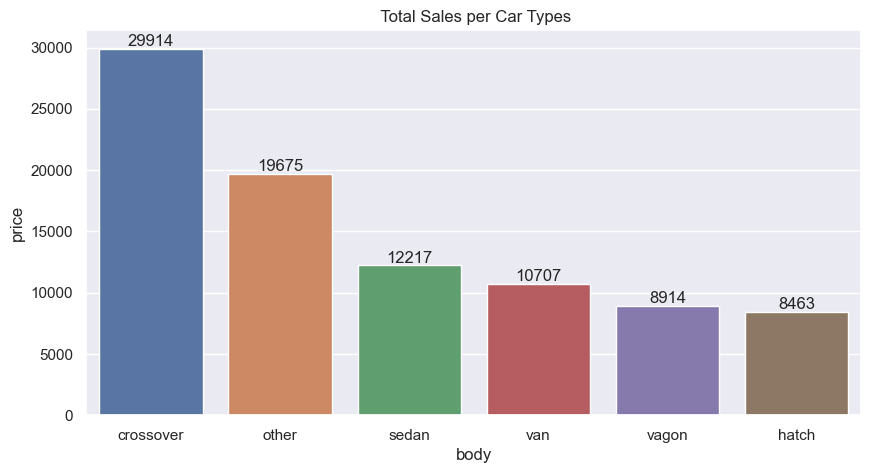

In [54]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='body',y='price', data=carsales, ci=None, order = a.index)
values = a.values
ax.bar_label(container = ax.containers[0], labels=values)
plt.title(" Total Sales per Car Types")
plt.show();

Insight:
Crossover cars are the highest priced with average price of 29,914